# COGS 118A - Project Checkpoint

# Names

- Kendrick Nguyen
- Mason Pak
- Noel Garcia

# Abstract 

In this day and age, electric vehicles (EVs) are taking over the streets due to its outweighing benefits in being environmentally friendly, efficient, and gas-free. However, a significant barrier that is preventing most households from switching to EVs is the convenience of charging stations. Thus, for our project we would like to create a model that predicts the availability of charging stations given inputs, such as maximum mileage, starting location and destination, and EV charging brands, to reassure the difficulties in road trip planning with EVs. 

Specific datasets we would employ for our model would be geographic and technical datasets of charging stations in the United States. All charging station observations will be trained using classification algorithms that would determine the optimal charging station for a test point, based on maximum mileage, starting location and destination, and EV charging brands. Metrics, such as precision, recall, F1 score, and AUC-ROC curve, will be used to measure the performance of the algorithms and models.

# Background

With the explosive market growth for EVs and charging system’s development, driving electric has become a popular trend. However, a huge leap that prevents everyone from buying an EV would be its arised difficulties, specifically vehicle mileage restrictions, charging station density distribution between suburbs and cities, and battery capacity<a name="garling"></a>[<sup>[1]</sup>](#garlingnote). Due to these issues, most households may prefer owning a gas vehicle for contemporary use. 

Relevant studies have addressed these difficulties by predicting the availability of charging stations and vehicle to home (V2H) services. Models used to optimize electricity bills have suggested that the less an EV is used for travelling, the greater its availability to participate in V2H services <a name="dominguez"></a>[<sup>[1]</sup>](#domingueznote).

# Problem Statement

In the scope of this project, we would like to predict the availability of vehicle charging stations from inputs, such as maximum mileage, starting location and destination, and EV charging brands. 

The problem is quantifiable and measurable in the sense of converting the distance of the nearest and optimal charging station into probability estimates from classification algorithms. Some charging sites can vary its charging time and cost; in the scenario the model yields multiple charging stations, we could rely on a decision tree model to greedily pick the optimal station. Metrics, such as precision, recall, F1 score, and AUC-ROC curve, will be used to measure the performance of the algorithms and models. Road trip planning is a recurring in many lives; therefore, we would like to generalize our solution for all EV drivers. Since the dataset we are using continually updates fueling station locations in the United States, our solution would generalize over time as well.

# Setup

Import the following packages, set global settings

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import folium

import random

sns.set(style='white', rc={'lines.linewidth': '0.3'})

# Data

## Electric & Alternative Fuel Charging Stations 2023 Dataset
- Link: https://www.kaggle.com/datasets/saketpradhan/electric-and-alternative-fuel-charging-stations or, alternatively, https://afdc.energy.gov/stations/#/find/nearest
- Number of observations: 65 variables, 70406 observations
- Description: An observation consist of a vehicle class, station name, location details, schedules, EV-connector types, etc. Some critical variables would be vehicle class, location details (specifically represented as latitude and longitude values), EV-connector types. The dataset appears to have numerous null entries, requiring cleaning.

In [2]:
stations_df = pd.read_csv('data/Electric and Alternative Fuel Charging Stations.csv', low_memory=False)

stations_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


## Cleaning of Electric & Alternative Fuel Charging Stations 2023 Dataset

In [3]:
# Show raw columns
stations_df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [4]:
# Standardize to US stations
stations_df = stations_df[stations_df['Country'] == 'US']

# Select columns of interest
stations_df = stations_df[['Station Name',
                           'Street Address',
                           'City',
                           'State',
                           'ZIP',
                           'Latitude',
                           'Longitude',
                           'EV Level1 EVSE Num',
                           'EV Level2 EVSE Num',
                           'EV DC Fast Count',
                           'EV Connector Types',
                           'Access Code']]

In [5]:
# Convert NaN values in charger count to zero
stations_df.update(stations_df[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].fillna(0))

# Drop rows of ANY column that has missing data NaN
stations_df = stations_df.dropna(axis='index')

# Rename columns
stations_labels = ['name',
                   'street_address',
                   'city',
                   'state',
                   'zip',
                   'latitude',
                   'longitude',
                   'level1_count',
                   'level2_count',
                   'dc_count',
                   'connectors',
                   'access']

stations_df = stations_df.rename(columns={stations_df.columns[i]: stations_labels[i] for i, _ in enumerate(stations_df.columns)})

In [6]:
# Cleaned dataset
stations_df.head()

,name,street_address,city,state,zip,latitude,longitude,level1_count,level2_count,dc_count,connectors,access
156,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,34.248319,-118.387971,0.0,39.0,3.0,CHADEMO J1772 J1772COMBO,private
157,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,34.052542,-118.448504,0.0,4.0,0.0,J1772,private
158,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,34.040539,-118.271387,0.0,12.0,0.0,J1772,public
159,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,34.059133,-118.248589,0.0,311.0,2.0,CHADEMO J1772 J1772COMBO,private
160,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,33.759802,-118.096665,0.0,19.0,1.0,CHADEMO J1772 J1772COMBO,private


# Proposed Solution

Our proposed solution to the problem is a model to assist road trip planning for EV drivers. We plan to utilize charging station observations from our dataset and estimate the distance between a starting location, ending location, and each other charging sites. The model will take inputs, such as maximum mileage, starting location and destination, and EV charging brands, to output a score of the relative available charging stations. As an potential feature, the model would output a map of an optimal route for a trip from starting location and destination.

For this application, classification algorithms, such as DBSCAN and logistic regression, would convert distances of the nearest and optimal charging station into probability estimates. Our methodologies for obtaining these distances would be through the [Map Request API](https://developer.mapquest.com/) for routes. Some charging sites can vary its charging time and cost; in the scenario the model yields multiple charging stations, we could rely on a decision tree model to greedily pick the optimal station.

# Evaluation Metrics

A evaluation metric to quantify the performance of the benchmark model and the solution model is utilize precision, recall, F1 score, and AUC-ROC curves. The benchmark model (or ground truths) in this case would default to the most nearest charging station distance in comarpison to the solution model which selects the optimal charging statoin for maximum mileage, EV port types, and charging cost.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

## Part I: Exploratory Data Analysis (EDA)

Get descriptive statistics for charger type variables using `describe()`. Examine `state`, `fuel_code`, `connectors`, and `access` distributions.

In [7]:
stations_df[['level1_count', 'level2_count', 'dc_count']].describe()

,level1_count,level2_count,dc_count
count,52825.000000,52825.000000,52825.000000
mean,0.018400,2.086455,0.479924
std,0.542843,3.143617,1.996708
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,2.000000,0.000000
75%,0.000000,2.000000,0.000000
max,51.000000,311.000000,56.000000


In [8]:
# Extract dataset list of connectors
connectors = []

for observation in stations_df['connectors']:
    connectors += observation.split(' ')

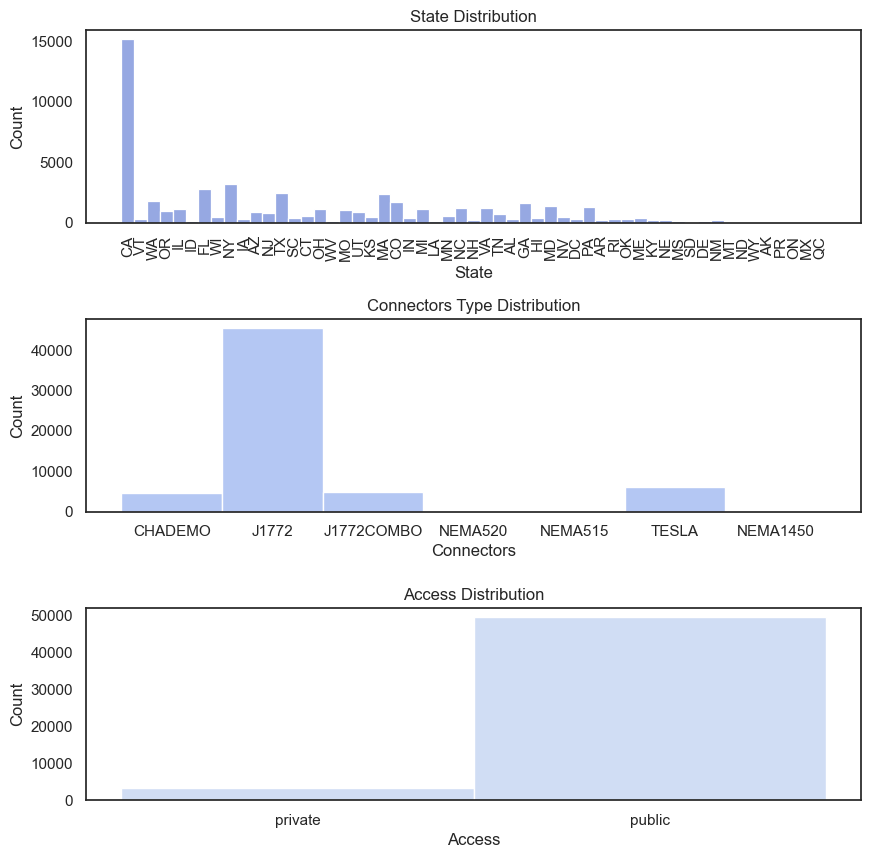

In [9]:
# Plot state, fuel_code, connectors, and access distributions
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

# State distribution
plt1 = sns.histplot(data=stations_df, x='state', ax=axes[0], color='#738bd9')
plt1.set(title='State Distribution',  xlabel='State', ylabel='Count')
plt1.tick_params(axis='x', rotation=90)

# Connectors distribution
plt2 = sns.histplot(data=connectors, ax=axes[1], color='#9bb5f0')
plt2.set(title='Connectors Type Distribution',  xlabel='Connectors', ylabel='Count')

# Access distributions
plt3 = sns.histplot(data=stations_df, x='access', ax=axes[2], color='#c1d2f1')
plt3.set(title='Access Distribution',  xlabel='Access', ylabel='Count')

plt.show()

Plot 100 random recorded US stations using `folium`.

In [10]:
# Extract dataset list of station coordinates
locations = []

for latitude, longitude in zip(stations_df['latitude'], stations_df['longitude']):
    locations += [[latitude, longitude]]

In [28]:
# Plot 100 random stations on the US map
map_stations = folium.Map(location=locations[0], zoom_start=4)

for station in random.choices(locations, k=100):
    folium.Marker(station).add_to(map_stations)

map_stations

# Ethics & Privacy

Our project uses a dataset pertaining to all charging stations in the United States and their vehicle class, station name, location details, schedules, EV-connector types, etc. information. Our dataset was found on Kaggle, a specialized Data Science community that caters to publishing as public datasets, but was orginally published by the National Renewable Energy Laboratory. Some limitations or biases of our selected datasets is that it is exclusive to the population of United States and Canada. Therefore, our findings may not generalize to all all EV drivers and road trip plannings.

# Team Expectations 

- Attend planned meetings on time
- Maintain communication/check-ins on Discord
- Contribute an equal portion to the project
- Understanding each others roles, strengths, and responsibilities

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/17  | 11 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/24  | 11 AM  | Import & Wrangle Data ,do some EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 5/31  | 11 AM  | Finalize wrangling/EDA; Begin programming for project | Discuss/edit project code; Complete project |
| 6/7  | 11 AM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/14  | Before 3:59 PM  | NA | Turn in Final Project  |

# Footnotes

<a name="garling"></a>1.[^](#garlingnote): Gärling and Thøgersen (1 January 2001) 
Marketing of electric vehicles. https://onlinelibrary.wiley.com/doi/abs/10.1002/1099-0836(200101/02)10:1%3C53::AID-BSE270%3E3.0.CO;2-E?casa_token=_RWO6TVTsRYAAAAA:VnD9Pwogm8DFhk4PyXZYdFFZtxNb7t-CXYrPfmWHlr5zYd4aKK8HOB_SnysEVD1p5_K0TLTlOCak83o<br>

<a name="dominguez"></a>1.[^](#domingueznote): Aguilar-Dominguez,Donovan (February 2021) 
Machine learning approach for electric vehicle availability forecast to provide vehicle-to-home services. https://www.sciencedirect.com/science/article/pii/S2352484721001517<br>